# 📘 Sensor Calibration: Polynomial and Linear Fits> Calibrate sensors using polynomial regression⏱️ **15-20 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Engineering**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/04_gallery/engineering/sensor_calibration.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🔬 Domain Background**Model:** $Output = a_0 + a_1 \cdot Input + a_2 \cdot Input^2 + ...$**Applications:** Temperature sensors, pressure transducers, load cells---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit


def quadratic(x, a, b, c):
    return a + b*x + c*x**2

## Generate Calibration Data

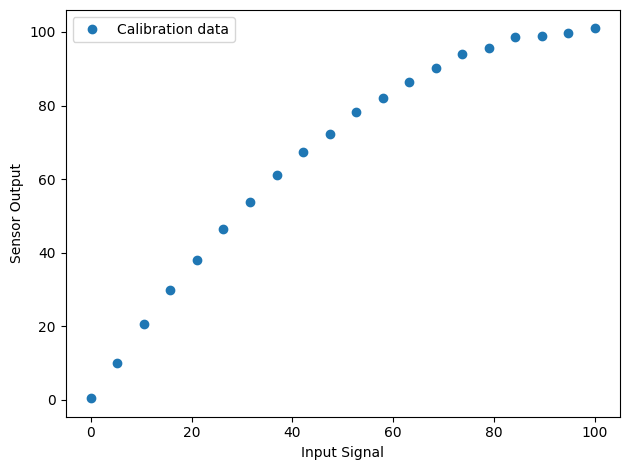

In [5]:
# True sensor response (nonlinear)
a_true, b_true, c_true = 0.5, 2.0, -0.01
x_input = np.linspace(0, 100, 20)  # Input signal
y_true = quadratic(x_input, a_true, b_true, c_true)
y_output = y_true + np.random.normal(0, 0.5, len(x_input))

plt.plot(x_input, y_output, 'o', label='Calibration data')
plt.xlabel('Input Signal')
plt.ylabel('Sensor Output')
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.show()


## Fit Calibration Curve

In [6]:
popt, pcov = curve_fit(quadratic, x_input, y_output, p0=[0, 2, 0])
a_fit, b_fit, c_fit = popt
perr = np.sqrt(np.diag(pcov))

print('Calibration equation:')
print(f'  Output = {a_fit:.3f} + {b_fit:.3f}*Input + {c_fit:.5f}*Input²')
print('\nParameter uncertainties:')
print(f'  σ(a) = {perr[0]:.3f}')
print(f'  σ(b) = {perr[1]:.3f}')
print(f'  σ(c) = {perr[2]:.5f}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=20 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=20 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=21278.47804783312 | grad_norm=4.2862e+06 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.192713s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=1.9219 | elapsed=1.193s | final_gradient_norm=4.6839e-11


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.862525s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.8625 | final_cost=3.8437 | covariance_warning=False


Calibration equation:
  Output = 0.469 + 2.001*Input + -0.01001*Input²

Parameter uncertainties:
  σ(a) = 0.290
  σ(b) = 0.013
  σ(c) = 0.00013


## Validate Calibration

In [7]:
# Test with new data
x_test = np.array([25, 50, 75])
y_predicted = quadratic(x_test, *popt)

print('\nCalibration validation:')
for x, y in zip(x_test, y_predicted, strict=False):
    print(f'  Input {x} → Output {y:.2f}')


Calibration validation:
  Input 25 → Output 44.23
  Input 50 → Output 75.48
  Input 75 → Output 94.21


## Key Insights1. **Quadratic captures sensor nonlinearity**2. **Residuals indicate calibration quality**3. **Regular recalibration** needed for drift---